In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("Dataset shape: ", df.shape)
print("\nFirst few rows: ")
df.head()

Dataset shape:  (7043, 21)

First few rows: 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Types of data

In [3]:

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Checking for missing values

In [4]:

missing_values_count = df.isnull().sum()
missing_values_count[0:21]

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No missing values found

## Checking for how many people churned

Churn
Yes    26.536987
Name: count, dtype: float64


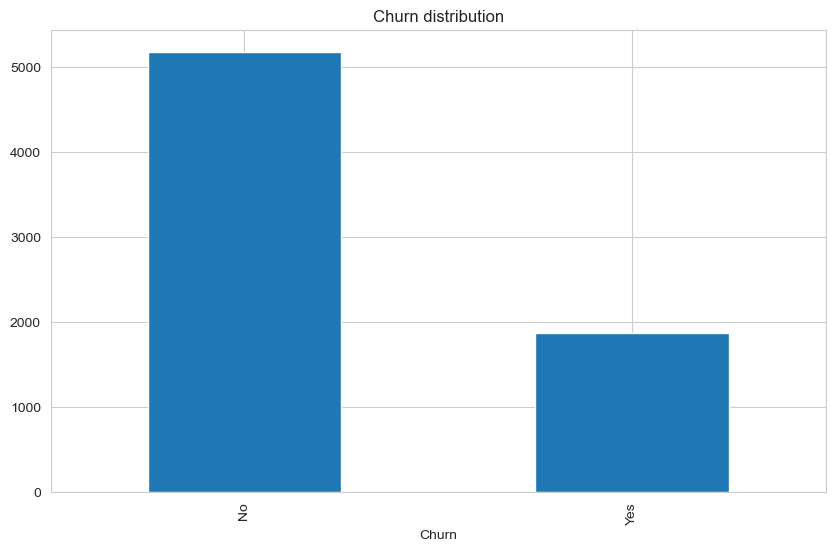

In [5]:
df['Churn'].value_counts()

left = df.loc[df['Churn'] == "Yes", "Churn"].value_counts()
percentage_left = (left / df.shape[0]) * 100
print(percentage_left)

df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn distribution')
plt.show()



## Contract's impact on churn

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
Contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64


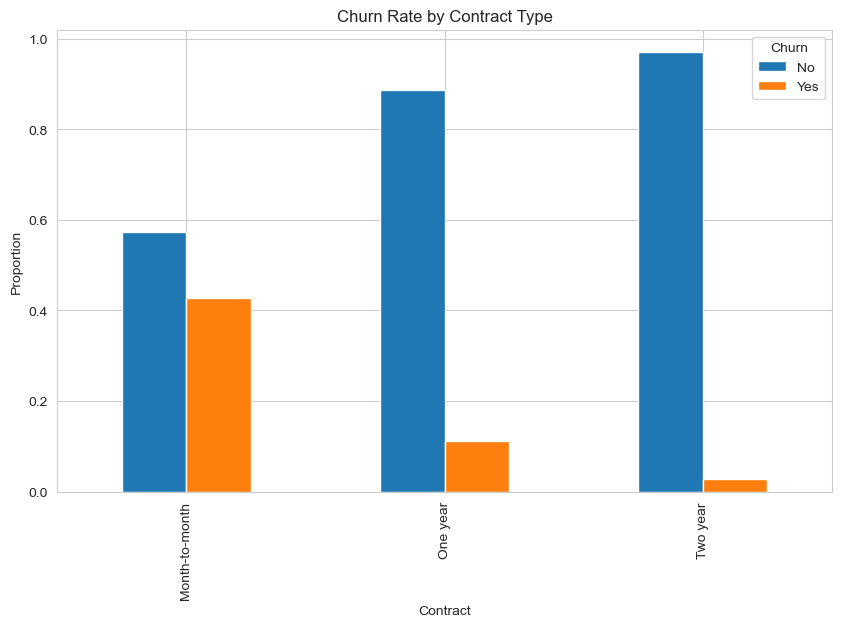

In [6]:
print(df["Contract"].value_counts())


churned_customers = df[df["Churn"] == "Yes"]
churn_counts = churned_customers["Contract"].value_counts()
print(churn_counts)

pd.crosstab(df['Contract'], df['Churn'], normalize='index').plot(kind='bar')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion')
plt.show()


Clearly people with monthly contracts are significantly more likely to churn. Also the shorter the contract, the more likely for the customer will churn.

# Do customers with high monthly charges churn more?

In [7]:
q3 = df["MonthlyCharges"].quantile(0.75)

high_charges = df[df["MonthlyCharges"] > q3]
low_charges = df[df["MonthlyCharges"] <= q3]

high_count = high_charges["Churn"].value_counts()
low_count = low_charges["Churn"].value_counts()

percentage_amongst_high_charge = (high_count.get("Yes") / high_count.sum()) * 100
print("High monthly charge percentage of churn: ", percentage_amongst_high_charge)

percentage_amongst_low_charge = (low_count.get("Yes") / low_count.sum()) * 100
print("Low monthly charge percentage of churn: ", percentage_amongst_low_charge)


High monthly charge percentage of churn:  32.8782707622298
Low monthly charge percentage of churn:  24.427625354777675


We can notice a slight correlation, but nothing major.

# Checking for any obvious patterns amongst the data

In [ ]:
#Obvious patterns
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

#pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100
#pd.crosstab(df['Partner'], df['Churn'], normalize='index') * 100
#pd.crosstab(df['Dependents'], df['Churn'], normalize='index') * 100
#pd.crosstab(df['PhoneService'], df['Churn'], normalize='index') * 100
#pd.crosstab(df['MultipleLines'], df['Churn'], normalize='index') * 100
pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
#pd.crosstab(df['OnlineSecurity'], df['Churn'], normalize='index') * 100
#pd.crosstab(df['DeviceProtection'], df['Churn'], normalize='index') * 100
#pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100
#pd.crosstab(df['StreamingTV'], df['Churn'], normalize='index') * 100
#pd.crosstab(df['StreamingMovies'], df['Churn'], normalize='index') * 100
#pd.crosstab(df['PaperlessBilling'], df['Churn'], normalize='index') * 100
#pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


Partnered customers more likely to stay.


Customers with no dependents more likely to stay.


Fiber optic internet service significantly more likely to churn.


Customers with no online security (but with internet service) significantly more likely to churn.


Customers with no device protection (but with internet service) slightly more likely to churn.


Customers with no tech support (but with internet service) significantly more likely to churn.


Customers with paperless billing significantly more likely to churn.


Customers paying with electronic checks significantly more likely to churn.


# Looking for anomalies in data

In [9]:
#checking numerical values
df['MonthlyCharges'].describe()

#Checking for anomalies
no_internet = df[df['InternetService'] == 'No']
print(no_internet['OnlineSecurity'].value_counts())
print(no_internet['OnlineBackup'].value_counts())
print(no_internet['DeviceProtection'].value_counts())
print(no_internet['TechSupport'].value_counts())
print(no_internet['StreamingTV'].value_counts())
print(no_internet['StreamingMovies'].value_counts())

"""No anomalies"""

#Checking for duplicates in customer id
df['customerID'].duplicated().sum()

#Checking data types
df.dtypes

"""Total charges is an object! """

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many failed to convert (became NaN)
print(f"Values that couldn't be converted: {df['TotalCharges'].isnull().sum()}")

OnlineSecurity
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No internet service    1526
Name: count, dtype: int64
TechSupport
No internet service    1526
Name: count, dtype: int64
StreamingTV
No internet service    1526
Name: count, dtype: int64
StreamingMovies
No internet service    1526
Name: count, dtype: int64
Values that couldn't be converted: 11


It turns out that TotalCharges column has a datatype of an object, not int64 or float64. There's 11 values in that column that can't be converted to numerical.

## Summary

1. **Class imbalance:** ~27% churn rate - will need to handle this in modeling
2. **Contract type is crucial:** Month-to-month churns 14x more than two-year
3. **Data quality issue:** TotalCharges stored as text, needs fixing

**To-Do**
- Fix TotalCharges data type issue
- Handle missing values after chaning to numerical
- Start data preprocessing